In [1]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from keras import models , layers
from keras.models import Sequential
from keras.layers import Dense , LSTM , GRU , Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Symptom2Disease.csv')

In [3]:
df.head()

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [4]:
df['Disease'] = df['label']

In [5]:
df['Description'] = df['text']

In [6]:
df.head()

,Unnamed: 0,label,text,Disease,Description
0,0,Psoriasis,I have been experiencing a skin rash on my arm...,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne...",Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp...",Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and...",Psoriasis,"My nails have small dents or pits in them, and..."


In [7]:
df = df.drop(['label','text','Unnamed: 0'],axis=1)

In [8]:
df.head()

,Disease,Description
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      1200 non-null   object
 1   Description  1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


In [10]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['Disease'])

In [11]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Description'])
sequences = tokenizer.texts_to_sequences(df['Description'])

In [12]:
max_sequence_length = 100
data_padded = pad_sequences(sequences, maxlen=max_sequence_length)

In [13]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

C:\Users\darshil\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_padded, labels, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 442ms/step - accuracy: 0.0703 - loss: 3.1715 - val_accuracy: 0.1927 - val_loss: 3.1237
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step - accuracy: 0.2518 - loss: 3.0612 - val_accuracy: 0.2500 - val_loss: 2.8862
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 330ms/step - accuracy: 0.3058 - loss: 2.7567 - val_accuracy: 0.3438 - val_loss: 2.4814
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 332ms/step - accuracy: 0.4075 - loss: 2.3125 - val_accuracy: 0.4427 - val_loss: 1.9556
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 325ms/step - accuracy: 0.5637 - loss: 1.6735 - val_accuracy: 0.5938 - val_loss: 1.4252
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 311ms/step - accuracy: 0.7151 - loss: 1.1651 - val_accuracy: 0.7240 - val_loss: 1.0558
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - accuracy: 0.8464 - loss: 0.7877 - val_accuracy: 0.7760 - val_loss: 0.8398
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.8850 - loss: 0.5652 - val_accuracy: 0

In [16]:
model.save('lstm_model.h5')


import pickle

with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('label_encoder.pkl', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [17]:
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step


In [18]:
predicted_classes

array([19, 12, 16, 14, 17, 22,  8, 19, 14, 12, 11, 15, 15, 11, 10, 18,  1,
        3, 11, 14,  5,  2,  9,  8, 22, 16,  9,  0,  5,  0,  5, 12,  9, 13,
        5,  0, 14, 17,  8,  9, 19, 16, 22,  5,  5,  8,  5, 15, 15, 10, 13,
       22,  5,  4, 16,  8,  4, 19, 21,  5,  8, 20, 10, 17, 17, 19, 17, 14,
        1,  7, 14, 16, 22, 17, 17, 14,  4, 17, 19, 12, 19,  6, 11, 16,  1,
       21, 20,  9, 21,  2,  1,  7,  6,  5, 19,  9,  1, 23,  6,  4,  0, 16,
       13, 17, 12, 13, 22, 23, 19, 23,  5, 12,  4,  4,  2, 21, 10, 17, 13,
        5,  1, 19, 21, 20, 14, 19,  8, 16,  9,  2,  6, 22,  8, 10, 21,  2,
        2,  7,  7, 23, 20,  2,  5,  2,  3,  1, 13,  9,  0,  7, 19,  8, 13,
       10, 23, 14,  8,  4, 22,  8, 20, 23, 19,  6,  4, 16, 17, 12, 11, 15,
        3, 18, 16, 16,  4,  0,  4, 22, 17,  3, 13, 11, 10, 21,  6, 19,  7,
       11, 14,  1, 11,  9,  4, 11,  7,  4, 17, 23, 18,  4, 11, 23,  9, 18,
       12, 10,  3, 13, 13, 22, 19, 14, 14, 12, 23, 16,  2, 10,  9,  0, 19,
       18, 21, 19,  4,  1

In [19]:
pred_df = pd.DataFrame({
    'Description': [tokenizer.sequences_to_texts([seq])[0] for seq in X_test],
    'Predicted Disease': label_encoder.inverse_transform(predicted_classes)
})

In [20]:
pred_df

,Description,Predicted Disease
0,i have respiratory issues especially when doin...,diabetes
1,i have a high fever chills and severe itching ...,Malaria
2,i've also had some diarrhea which has been rea...,Typhoid
3,i've recently been suffering with chills letha...,Pneumonia
4,the swelling in my legs has gotten worse over ...,Varicose Veins
...,...,...
235,i'm coughing nonstop and i'm shivering terribl...,Common Cold
236,i have a high temperature vomiting chills and ...,Malaria
237,i've been experiencing stiffness and weakness ...,Arthritis
238,my wound is healing more slowly these days my ...,diabetes


In [21]:
# Example code to test in Jupyter Notebook
description_input = "I have cold"
sequence = tokenizer.texts_to_sequences([description_input])
padded_sequence = pad_sequences(sequence, maxlen=100)

# Predict the disease
prediction = model.predict(padded_sequence)
predicted_class = prediction.argmax(axis=1)
disease_name = label_encoder.inverse_transform(predicted_class)

print("Input sequence:", sequence)
print("Padded sequence:", padded_sequence)
print("Raw prediction output:", prediction)
print("Predicted class index:", predicted_class)
print(f"Predicted disease: {disease_name[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Input sequence: [[3, 6, 345]]
Padded sequence: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   3   6 345]]
Raw prediction output: [[0.03511147 0.03217591 0.03977729 0.02056931 0.02647933 0.0222401
  0.01380014 0.02954545 0.01462548 0.04795962 0.0229263  0.01848321
  0.02819337 0.08961469 0.04342334 0.02078372 0.04721303 0.03273745
  0.05316371 0.10972166 0.07767422 0.05330524 0.06791647 0.05255954]]
Predicted class index: [19]
Predicted disease: diabetes


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have test data and labels
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11
           3       0.86      0.86      0.86         7
           4       0.43      0.50      0.46        12
           5       0.86      1.00      0.92        12
           6       0.83      0.42      0.56        12
           7       1.00      1.00      1.00         7
           8       1.00      0.92      0.96        13
           9       0.91      1.00      0.95        10
          10       1.00      0.91      0.95        11
          11       1.00      0.91      0.95        11
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00        10
          14       0.92      1.00      0.96        11
          15       1.00      0.83      0.91         6
          16       0.50      0.67      0.57

In [23]:
sequence = tokenizer.texts_to_sequences([description_input])
padded_sequence = pad_sequences(sequence, maxlen=100)
print("Tokenized and padded input:", padded_sequence)


Tokenized and padded input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   3   6 345]]


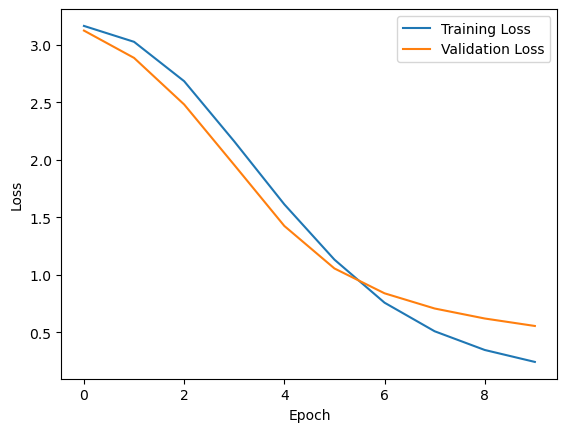

In [24]:
import matplotlib.pyplot as plt

# Assuming you have history from model training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
description_input = "i have daibetes"
sequence = tokenizer.texts_to_sequences([description_input])
padded_sequence = pad_sequences(sequence, maxlen=100)
prediction = model.predict(padded_sequence)
print("Model prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Model prediction: [[0.03542004 0.03243119 0.04215478 0.02126137 0.02688133 0.02358893
  0.01476328 0.03148933 0.01595165 0.0472623  0.02337599 0.0198617
  0.02960637 0.08756295 0.04391886 0.02123667 0.04830013 0.0319817
  0.05108975 0.10347907 0.07312219 0.05245775 0.0687291  0.05407362]]


In [26]:
df['Disease'].nunique()

24

In [27]:
df['Disease'].value_counts()

Psoriasis                          50
Varicose Veins                     50
peptic ulcer disease               50
drug reaction                      50
gastroesophageal reflux disease    50
allergy                            50
urinary tract infection            50
Malaria                            50
Jaundice                           50
Cervical spondylosis               50
Migraine                           50
Hypertension                       50
Bronchial Asthma                   50
Acne                               50
Arthritis                          50
Dimorphic Hemorrhoids              50
Pneumonia                          50
Common Cold                        50
Fungal infection                   50
Dengue                             50
Impetigo                           50
Chicken pox                        50
Typhoid                            50
diabetes                           50
Name: Disease, dtype: int64

In [30]:
df['Disease'].unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

In [31]:
len(['hello',2,3,4])

4